In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Read Fashion MNIST dataset

import util_mnist_reader
X_train, y_train = util_mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')




/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
def sigmoid(x):
  return 1/(1+np.exp(-x))  

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid(x))

def relu(x):
    return keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)

def compute_loss(Y, Y_hat):
 
    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1./m) * L_sum

    return L

In [17]:
weights = np.random.rand(784, 1000)
learning_rate = 0.1
weights1 = np.random.rand(1000, 10)

In [32]:
for epochs in range(30):
 #     feed forward
    z_hidden = np.dot(X_train, weights)
    a_hidden = sigmoid(z_hidden)
 #     a_hidden = z_hidden
    
    z_output = np.dot(a_hidden, weights1)
    a = sigmoid(z_output)

 #     back propagation
    error_out = ((1 / 60000) * (np.power((a.T - y_train), 2)))
    print(error_out.sum())

    cost_a = a.T - y_train # derivative of cost with repect to a
    a_zo = sigmoid_der(z_output) # derivative of a with respect to z_output
    z_zo = 0
    zo_wo = a_hidden #derivative of z_output with respect to weights output layer

    cost_wo = np.dot(zo_wo.T, cost_a.T * a_zo) # derivative of cost with respect to weights output layer "Chain Rule"
    
    cost_zo = cost_a.T * a_zo # derivative of cost with respect to z_output
    
    cost_ah = np.dot(cost_zo , weights1.T) # derivative of cost with respect to a hidden layer
    ah_zh = sigmoid_der(z_hidden) # derivative of a hidden layer with respect to z hidden layer
    zh_wh = X_train # derivative of z hidden layer with respect to weights hidden layer
    cost_wh = np.dot(zh_wh.T, ah_zh * cost_ah) #derivative of cost with respect to weights hidden layer "Chain Rule"
    
    weights -= learning_rate * cost_wh
    weights1 -= learning_rate * cost_wo
    print(weights)


205.00000000000009
[[0.32354786 0.19423848 0.4875071  ... 0.63076609 0.09350566 0.32501623]
 [0.6638126  0.32699968 0.19931853 ... 0.53765236 0.33446388 0.00412059]
 [0.74702933 0.84328093 0.65338942 ... 0.46632246 0.59012239 0.64540612]
 ...
 [0.2166595  0.45361206 0.14422006 ... 0.23601728 0.13365363 0.33166973]
 [0.60125011 0.31956719 0.49581016 ... 0.82362005 0.29897756 0.98873902]
 [0.13949109 0.14650027 0.76779813 ... 0.07671671 0.0708197  0.6053483 ]]
205.00000000000009
[[0.32354786 0.19423848 0.4875071  ... 0.63076609 0.09350566 0.32501623]
 [0.6638126  0.32699968 0.19931853 ... 0.53765236 0.33446388 0.00412059]
 [0.74702933 0.84328093 0.65338942 ... 0.46632246 0.59012239 0.64540612]
 ...
 [0.2166595  0.45361206 0.14422006 ... 0.23601728 0.13365363 0.33166973]
 [0.60125011 0.31956719 0.49581016 ... 0.82362005 0.29897756 0.98873902]
 [0.13949109 0.14650027 0.76779813 ... 0.07671671 0.0708197  0.6053483 ]]
205.00000000000009
[[0.32354786 0.19423848 0.4875071  ... 0.63076609 0.093

205.00000000000009
[[0.32354786 0.19423848 0.4875071  ... 0.63076609 0.09350566 0.32501623]
 [0.6638126  0.32699968 0.19931853 ... 0.53765236 0.33446388 0.00412059]
 [0.74702933 0.84328093 0.65338942 ... 0.46632246 0.59012239 0.64540612]
 ...
 [0.2166595  0.45361206 0.14422006 ... 0.23601728 0.13365363 0.33166973]
 [0.60125011 0.31956719 0.49581016 ... 0.82362005 0.29897756 0.98873902]
 [0.13949109 0.14650027 0.76779813 ... 0.07671671 0.0708197  0.6053483 ]]
205.00000000000009
[[0.32354786 0.19423848 0.4875071  ... 0.63076609 0.09350566 0.32501623]
 [0.6638126  0.32699968 0.19931853 ... 0.53765236 0.33446388 0.00412059]
 [0.74702933 0.84328093 0.65338942 ... 0.46632246 0.59012239 0.64540612]
 ...
 [0.2166595  0.45361206 0.14422006 ... 0.23601728 0.13365363 0.33166973]
 [0.60125011 0.31956719 0.49581016 ... 0.82362005 0.29897756 0.98873902]
 [0.13949109 0.14650027 0.76779813 ... 0.07671671 0.0708197  0.6053483 ]]
205.00000000000009
[[0.32354786 0.19423848 0.4875071  ... 0.63076609 0.093

In [33]:
# Multilayer NN
X_trainM = X_train
X_testM = X_test

y_trainM = keras.utils.to_categorical(y_train)
y_testM = y_test
model = Sequential()

In [34]:

model.add(keras.layers.Dense(
    units=50,
    input_dim=X_trainM.shape[1],
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    activation='sigmoid') 
)

model.add(
    keras.layers.Dense(
        units=50,
        input_dim=50,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='sigmoid')
    )

model.add(
    keras.layers.Dense(
        units=50,
        input_dim=50,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='sigmoid')
    )

model.add(
    keras.layers.Dense(
        units=y_trainM.shape[1],
        input_dim=50,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='sigmoid')
    )

sgd_optimizer = keras.optimizers.SGD(
    lr=0.001, decay=1e-7, momentum=0.9
)

model.compile(
    optimizer=sgd_optimizer,
    loss='categorical_crossentropy'
)

In [35]:
history = model.fit(
    X_trainM, y_trainM,
    batch_size=64, epochs=50,
    verbose=1, validation_split=0.1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 3s 64us/step - loss: 2.2901 - val_loss: 2.2715
Epoch 2/50
54000/54000 [==============================] - 3s 58us/step - loss: 2.2535 - val_loss: 2.2311
Epoch 3/50
54000/54000 [==============================] - 3s 55us/step - loss: 2.1912 - val_loss: 2.1341
Epoch 4/50
54000/54000 [==============================] - 3s 59us/step - loss: 2.0291 - val_loss: 1.9106
Epoch 5/50
54000/54000 [==============================] - 3s 55us/step - loss: 1.8023 - val_loss: 1.7155
Epoch 6/50
54000/54000 [==============================] - 3s 59us/step - loss: 1.6500 - val_loss: 1.5898
Epoch 7/50
54000/54000 [==============================] - 3s 56us/step - loss: 1.5311 - val_loss: 1.4671
Epoch 8/50
54000/54000 [==============================] - 3s 54us/step - loss: 1.4032 - val_loss: 1.3393
Epoch 9/50
54000/54000 [==============================] - 3s 59us/step - loss: 1.2809 - val_loss: 1.2224
Epoch 

In [36]:

y_test_pred = model.predict_classes(X_testM, verbose=0)
correct_preds = np.sum(y_test == y_test_pred, axis=0)
test_acc = correct_preds / y_testM.shape[0]

print(f'Test accuracy: {(test_acc * 100):.2f}')

Test accuracy: 77.32


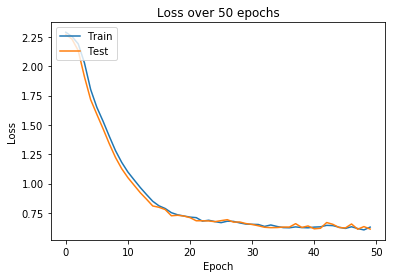

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over 50 epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
confusion_matrix(y_trainM, y_train_pred.argmax(axis=1))

In [2]:
#Convolutional NN
X_trainC = X_train.reshape(60000,28,28,1)
X_testC = X_test.reshape(10000,28,28,1)

y_trainC = to_categorical(y_train)
y_testC = to_categorical(y_test)

mod = Sequential()

In [3]:
mod.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
mod.add(Conv2D(32, kernel_size=3, activation='relu'))
mod.add(Flatten())
mod.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
mod.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
histor = mod.fit(X_trainC, y_trainC, validation_data=(X_testC, y_testC), epochs=3)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 86s 1ms/step - loss: 0.7189 - accuracy: 0.8315 - val_loss: 0.4052 - val_accuracy: 0.8571
Epoch 2/3
60000/60000 [==============================] - 84s 1ms/step - loss: 0.2953 - accuracy: 0.8923 - val_loss: 0.3427 - val_accuracy: 0.8795
Epoch 3/3
60000/60000 [==============================] - 86s 1ms/step - loss: 0.2480 - accuracy: 0.9100 - val_loss: 0.3706 - val_accuracy: 0.8731


In [6]:
mod.predict(X_testC[:4])


array([[6.4096021e-08, 2.8589167e-09, 3.3614900e-09, 5.5382106e-08,
        3.3888320e-08, 7.5016331e-05, 2.0225107e-08, 4.0987652e-05,
        2.4874851e-07, 9.9988353e-01],
       [2.6946459e-03, 2.7782298e-03, 8.1129587e-01, 3.2120727e-03,
        8.8440850e-02, 3.8020022e-07, 9.1525525e-02, 5.6487849e-08,
        2.1464031e-05, 3.0824314e-05],
       [1.9077682e-08, 9.9999928e-01, 2.5883278e-07, 6.8802343e-08,
        1.0576443e-09, 3.1439626e-08, 6.6798274e-09, 3.2374530e-11,
        3.8131103e-07, 9.5680408e-10],
       [6.2135978e-06, 9.9995804e-01, 2.2393336e-09, 1.2326012e-05,
        8.8020965e-07, 1.0570976e-07, 2.4736239e-06, 3.6220719e-08,
        3.1109185e-08, 1.9987450e-05]], dtype=float32)

In [7]:
y_testC[:4]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
y_test_pre = mod.predict_classes(X_testC, verbose=0)
correct_pred = np.sum(y_test == y_test_pre, axis=0)
test_ac = correct_pred / y_testC.shape[0]
print(f'Test accuracy: {(test_ac * 100):.2f}')

Test accuracy: 87.31


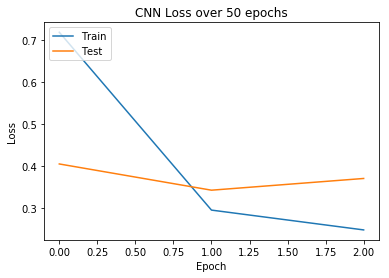

In [15]:
plt.plot(histor.history['loss'])
plt.plot(histor.history['val_loss'])
plt.title('CNN Loss over 50 epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
confusion_matrix(y_trainC.argmax(axis=1), pre.argmax(axis=1))